# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [5]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [7]:
# Create a Beautiful Soup Object
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

# Find the table element
table = soup.find('table', class_='table')



In [8]:
# Extract all rows of data
rows = table.find_all('tr')

# Create an empty list to hold row data
data = []

# Loop through rows and extract columns
for row in rows:
    columns = row.find_all('td')
    # Only add rows with data
    if columns:
        data.append([col.text.strip() for col in columns])

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [10]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in rows:  # 'rows' should contain all <tr> elements from the table
    # Extract all <td> elements (columns) in the current row
    columns = row.find_all('td')
    
    # If the row contains data (i.e., it has <td> elements)
    if columns:
        # Extract and clean text from each <td> element, then store as a list
        row_data = [col.text.strip() for col in columns]
        
        # Append the row data to the 'data' list
        data.append(row_data)


In [11]:
# Define the column names based on the table headings
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(data, columns=columns)

In [12]:
# Confirm DataFrame was created successfully
print(mars_df.head())

   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [14]:
# Examine data type of each column
print(mars_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB
None


In [15]:
# Change data types for data analysis
# Step 1: Convert 'terrestrial_date' to datetime
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

# Step 2: Convert 'sol', 'ls', 'month' to integers
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)

# Step 3: Convert 'min_temp' and 'pressure' to floats
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [16]:
# Confirm type changes were successful by examining data types again
print(mars_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(3), object(1)
memory usage: 80.4+ KB
None


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [18]:
# 1. How many months are there on Mars?
unique_months = mars_df['month'].nunique()
print(f"Number of unique months on Mars: {unique_months}")

Number of unique months on Mars: 12


In [19]:
# 2. How many sols (Martian days) worth of data are there?
unique_sols = mars_df['sol'].nunique()
print(f"Number of unique Martian days (sols): {unique_sols}")

Number of unique Martian days (sols): 1867


In [20]:
# 3. What is the average minimum temperature by month?
avg_temp_per_month = mars_df.groupby('month')['min_temp'].mean()

# Display the average minimum temperature by month
print(avg_temp_per_month)


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


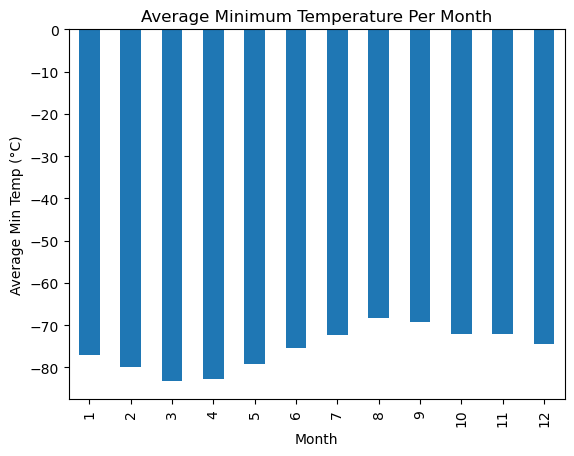

In [21]:
# Plot the average minimum temperature by month
avg_temp_per_month.plot(kind='bar', title="Average Minimum Temperature Per Month")
plt.ylabel("Average Min Temp (°C)")
plt.xlabel("Month")
plt.show()

Coldest month: 3 with average temperature -83.31°C
Warmest month: 8 with average temperature -68.38°C


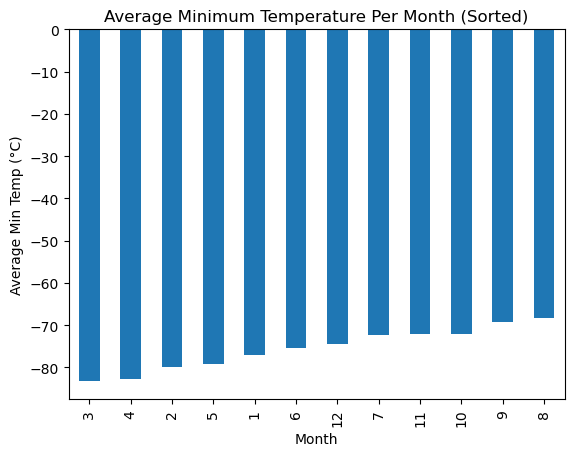

In [22]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_avg_temp_per_month = avg_temp_per_month.sort_values()

# Display the coldest and warmest months
coldest_month = sorted_avg_temp_per_month.idxmin()
warmest_month = sorted_avg_temp_per_month.idxmax()

print(f"Coldest month: {coldest_month} with average temperature {sorted_avg_temp_per_month[coldest_month]:.2f}°C")
print(f"Warmest month: {warmest_month} with average temperature {sorted_avg_temp_per_month[warmest_month]:.2f}°C")

# Plot the sorted results as a bar chart
sorted_avg_temp_per_month.plot(kind='bar', title="Average Minimum Temperature Per Month (Sorted)")
plt.ylabel("Average Min Temp (°C)")
plt.xlabel("Month")
plt.show()


In [23]:
# 4. What is the average pressure by month?
avg_pressure_per_month = mars_df.groupby('month')['pressure'].mean()

# Display the average atmospheric pressure by month
print(avg_pressure_per_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


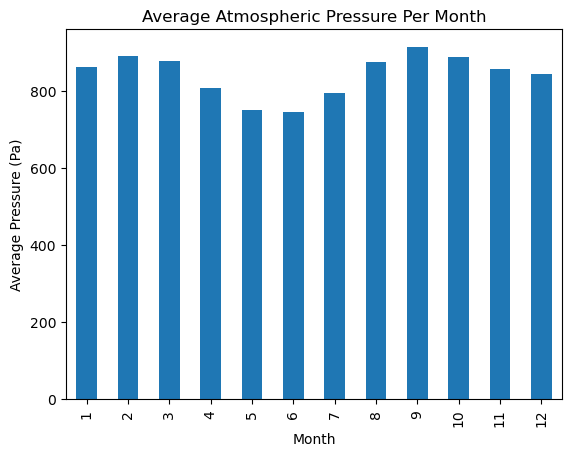

In [24]:
# Plot the average pressure by month
avg_pressure_per_month.plot(kind='bar', title="Average Atmospheric Pressure Per Month")
plt.ylabel("Average Pressure (Pa)")
plt.xlabel("Month")
plt.show()

Month with the lowest atmospheric pressure: 6 with average pressure 745.05 Pa
Month with the highest atmospheric pressure: 9 with average pressure 913.31 Pa


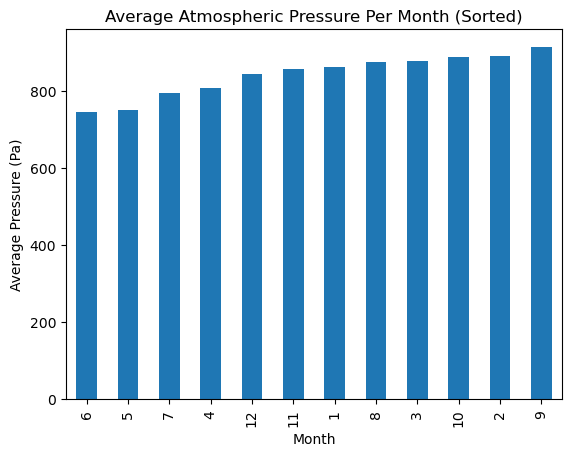

In [25]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_pressure_per_month = avg_pressure_per_month.sort_values()

# Display the month with the lowest and highest pressure
lowest_pressure_month = sorted_avg_pressure_per_month.idxmin()
highest_pressure_month = sorted_avg_pressure_per_month.idxmax()

print(f"Month with the lowest atmospheric pressure: {lowest_pressure_month} with average pressure {sorted_avg_pressure_per_month[lowest_pressure_month]:.2f} Pa")
print(f"Month with the highest atmospheric pressure: {highest_pressure_month} with average pressure {sorted_avg_pressure_per_month[highest_pressure_month]:.2f} Pa")

# Plot the sorted results as a bar chart
sorted_avg_pressure_per_month.plot(kind='bar', title="Average Atmospheric Pressure Per Month (Sorted)")
plt.ylabel("Average Pressure (Pa)")
plt.xlabel("Month")
plt.show()


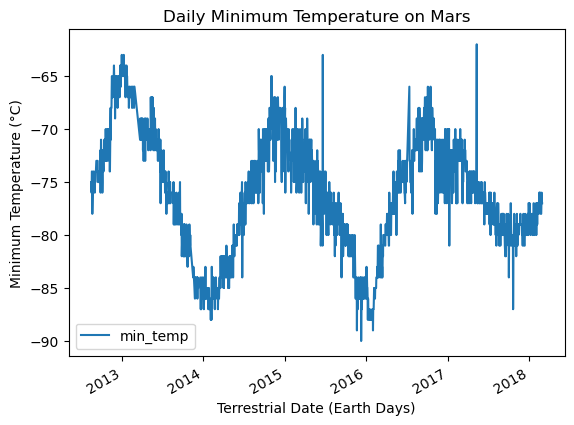

In [26]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
mars_df.plot(x='terrestrial_date', y='min_temp', title="Daily Minimum Temperature on Mars")
plt.ylabel("Minimum Temperature (°C)")
plt.xlabel("Terrestrial Date (Earth Days)")
plt.show()
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.


#### Minimum Temperature

Mars is extremely cold, with temperatures often dropping to around -75°C. The coldest months happen during the Martian winter, while the warmest months occur during the summer.

#### Atmospheric Pressure

Mars has very thin air with much lower atmospheric pressure than Earth. It fluctuates slightly throughout the Martian year but remains mostly low, which makes it challenging for humans to survive without special equipment.

#### Year Length

A Martian year lasts about 687 Earth days, almost twice as long as an Earth year. This long year is due to Mars taking longer to orbit the Sun, and we can see the temperature patterns repeat in this cycle.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [31]:
# Write the data to a CSV
mars_df.to_csv('mars_weather_data.csv', index=False)

print("Data has been written to 'mars_weather_data.csv'")

Data has been written to 'mars_weather_data.csv'


In [32]:
browser.quit()